# Week 1 homework

In [6]:
ls -lh

total 44008
-rw-r--r--@ 1 chekwei  staff    11M 22 May 22:03 fhv_tripdata_2021-01.parquet
-rw-r--r--@ 1 chekwei  staff    10M 22 May 22:03 fhv_tripdata_2021-02.parquet


In [5]:
import pandas as pd

## Question 1

In [10]:
df = pd.read_parquet("fhv_tripdata_2021-01.parquet")

In [12]:
df.head(4)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037


In [14]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


## Question 2

In [23]:
df[0:1]

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009


In [25]:
# df[df["dispatching_base_num"]=="B00009"]
df[0:1]["dropOff_datetime"] - df[0:1]["pickup_datetime"]

0   0 days 00:17:00
dtype: timedelta64[ns]

In [26]:
df["travel_duration"] = df["dropOff_datetime"] - df["pickup_datetime"]

In [30]:
df["travel_duration"] = df["travel_duration"].apply(lambda td: td.total_seconds()/60)

In [32]:
df["travel_duration"].mean()

19.167224093791006

## Data Preparation

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df.drop(df[df.travel_duration > 60].index, inplace=True)
df.drop(df[df.travel_duration < 1].index, inplace=True)

In [48]:
df["travel_duration"].max()

60.0

In [49]:
df["travel_duration"].min()

1.0

/opt/homebrew/Caskroom/miniforge/base/envs/mlops_zoomcamp/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='travel_duration', ylabel='Density'>

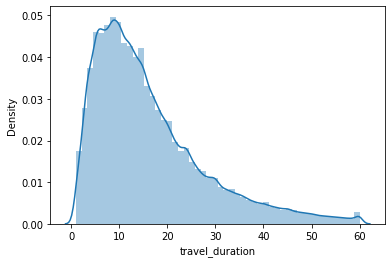

In [45]:
sns.distplot(df["travel_duration"])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109826 entries, 0 to 1154111
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1109826 non-null  object        
 1   pickup_datetime         1109826 non-null  datetime64[ns]
 2   dropOff_datetime        1109826 non-null  datetime64[ns]
 3   PUlocationID            182818 non-null   float64       
 4   DOlocationID            961919 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1109053 non-null  object        
 7   travel_duration         1109826 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 76.2+ MB


## Question 3

In [53]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending= False, inplace=True)

In [54]:
missing_value_df

,column_name,percent_missing
SR_Flag,SR_Flag,100.000000
PUlocationID,PUlocationID,83.527328
DOlocationID,DOlocationID,13.327044
Affiliated_base_number,Affiliated_base_number,0.069651
dispatching_base_num,dispatching_base_num,0.000000
pickup_datetime,pickup_datetime,0.000000
dropOff_datetime,dropOff_datetime,0.000000
travel_duration,travel_duration,0.000000
